### 문제 4.2

In [16]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
d = {'a':[1,2,3], 'b':[4,5],'c':[6,7,8]}
d.items()

dict_items([('a', [1, 2, 3]), ('b', [4, 5]), ('c', [6, 7, 8])])

In [19]:
l = pd.DataFrame(dict([(k, pd.Series(v)) for k,v in d.items()]))
l # 데이터 프레임 제작 시 빈칸을 NA로 만드는 코드, 원하는 결과가 나오지 않음

,a,b,c
0,1,4.0,6
1,2,5.0,7
2,3,NaN,8


In [82]:
str = ["Blackouts, Brittle system, Butterfly effect, Byzantine failure, Cascading rollback, Chain reaction, Chaos theory, Cache stampede, Congestion collapse,\
Domino effect, For Want of a Nail (proverb), Network science, Network theory, Interdependent networks, Kessler Syndrome, Percolation theory,\
Progressive collapse, Virtuous circle and vicious circle, Wicked problem"]

In [84]:
d = pd.DataFrame({'Cascading failure':[str[0].split(',')]})
d # 한 노드의 전체 이웃을 가져와 분할, 하지만 묶여서 나와서 실패

,Cascading failure
0,"[Blackouts, Brittle system, Butterfly effect..."


### 엑셀 활용

In [58]:
a = pd.read_excel('data/wiki.xlsx', header = None)

In [59]:
a

,0,1,2
0,Network science,Cascading failure,Blackouts
1,Network science,Cascading failure,Brittle system
2,Network science,Cascading failure,Butterfly effect
3,Network science,Cascading failure,Byzantine failure
4,Network science,Cascading failure,Cascading rollback
...,...,...,...
270,Network science,Random networks,Flow graph
271,Network science,Random networks,Max-flow min-cut theorem
272,Network science,Random networks,Oriented matroid
273,Network science,Random networks,Shortest path problem


In [87]:
a.isnull().sum() # 결측치 확인

0    0
1    0
2    8
dtype: int64

In [78]:
a[a[2].isnull()] # Network science 이웃의 링크가 없는 경우 

,0,1,2
34,Network science,Rumor spread in social network,NaN
44,Network science,Networks in labor economics,NaN
58,Network science,Immune network theory,NaN
59,Network science,Non-linear preferential attachment,NaN
65,Network science,Communicative ecology,NaN
178,Network science,Dual-phase evolution,NaN
253,Network science,Network formation,NaN
264,Network science,Network theory in risk assessment,NaN


In [157]:
b = a.replace(np.nan, 'None')
b.isnull().sum()

0    0
1    0
2    0
dtype: int64

In [158]:
b

,0,1,2
0,Network science,Cascading failure,Blackouts
1,Network science,Cascading failure,Brittle system
2,Network science,Cascading failure,Butterfly effect
3,Network science,Cascading failure,Byzantine failure
4,Network science,Cascading failure,Cascading rollback
...,...,...,...
270,Network science,Random networks,Flow graph
271,Network science,Random networks,Max-flow min-cut theorem
272,Network science,Random networks,Oriented matroid
273,Network science,Random networks,Shortest path problem


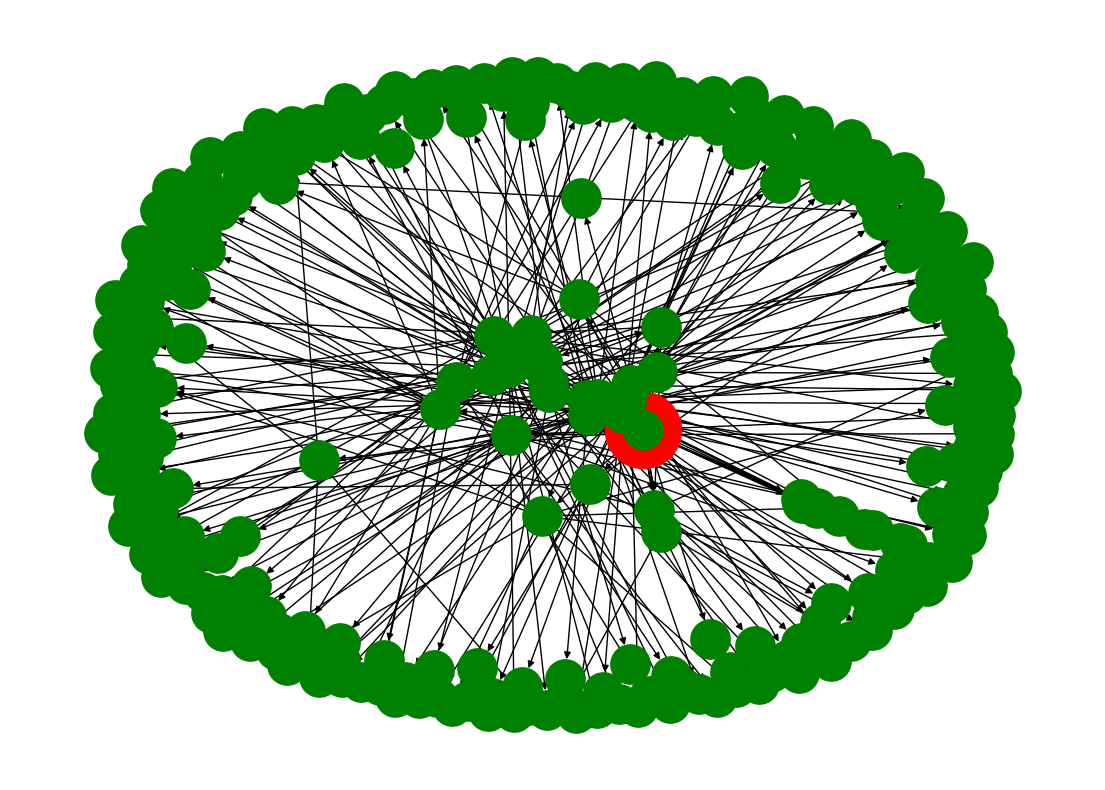

In [164]:
# 그림 크기 설정
plt.rcParams["figure.figsize"] = [14,10]

# Network Science의 그래프
g = nx.from_pandas_edgelist(b,0,1, create_using=nx.DiGraph())

# Network Science 이웃의 그래프
h = nx.from_pandas_edgelist(b,1,2, create_using=nx.DiGraph())

# 결합
u = nx.compose(g,h) 

ego = 'Network science'
pos = nx.spring_layout(u)

options = {"node_size":3000, "node_color":"r"}
nx.draw_networkx_nodes(u, pos, nodelist=[ego],**options) # ego 노드 크기와 색상 별도 설정

nx.draw(u, pos, node_color = 'green', node_size = 800) 
plt.show()

### 3번 문제

True

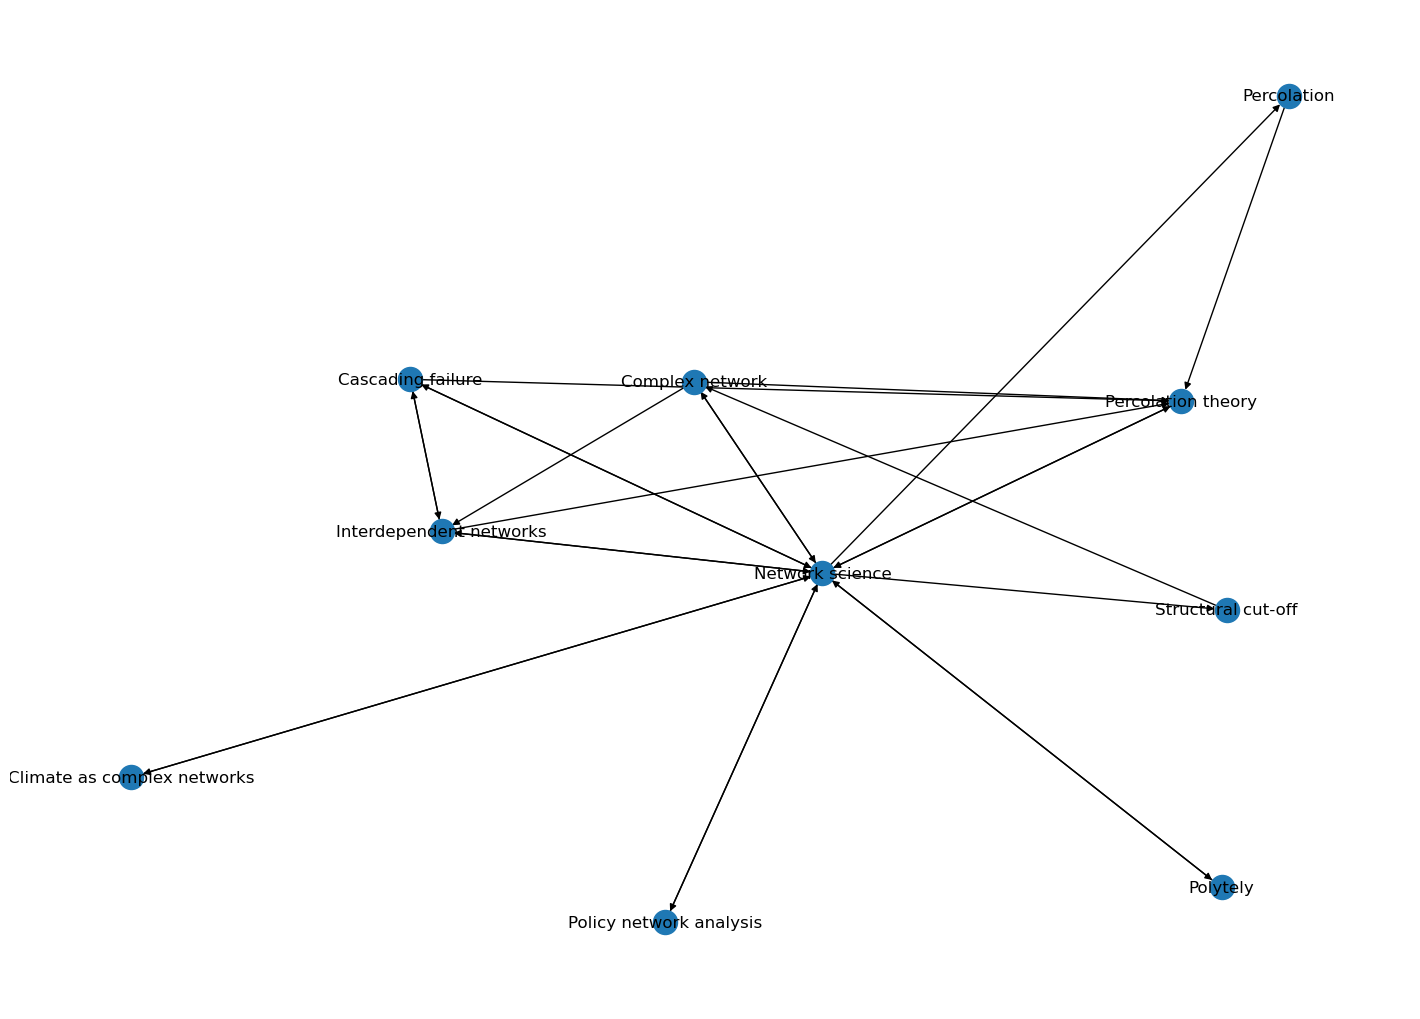

In [161]:
comps = sorted(nx.strongly_connected_components(u),key=len, reverse=True)
nodes_in_giant_comp = comps[0]
gc = nx.subgraph(u, nodes_in_giant_comp)
nx.draw(gc, with_labels = True)
nx.is_strongly_connected(gc)

### 4번 문제

In [169]:
out_degree_val = dict(u.out_degree())
del(out_degree_val['None'])
ans = []

for key, value in out_degree_val.items():
    if value == max(out_degree_val.values()) :
        ans.append(key)
print(ans)

['Systems theory']


### 5번 문제

In [168]:
in_degree_val = dict(u.in_degree())
del(in_degree_val['None'])
ans = []

for key, value in in_degree_val.items():
    if value == max(in_degree_val.values()) :
        ans.append(key)
print(ans)

['Network science']


### 문제 4.4

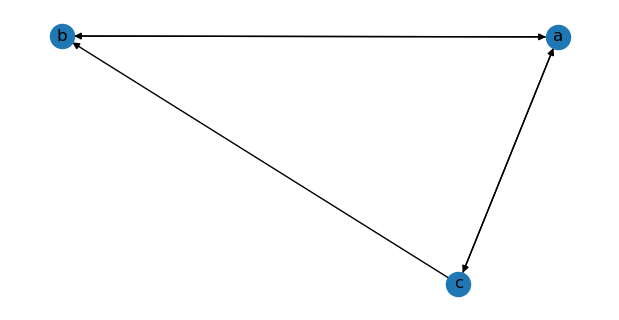

In [173]:
s = nx.DiGraph()
s.add_edges_from([
    ('a','b'),('a','c'),
    ('b','a'),
    ('c','a'),('c','b')
])

plt.rcParams["figure.figsize"] = [6,3]
nx.draw(s, with_labels = True)

In [199]:
nx.pagerank(s, alpha = 1)

{'a': 0.4444440205891927, 'b': 0.3333333333333333, 'c': 0.22222264607747394}

In [198]:
nx.pagerank(s, alpha=0.8) # 순간이동 계수 0.2

{'a': 0.42857117291861335, 'b': 0.33333333333333337, 'c': 0.23809549374805336}

### 문제 4.7

In [191]:
math = nx.read_graphml('data/enwiki_math.graphml.gz')

In [192]:
rank = nx.pagerank(math)
res = [key for (key, value) in sorted(rank.items(), key = lambda x:x[1], reverse= True)] # pagerank가 높은 key를 순서대로 출력
print(res[:10])

['18831', '1152126', '18902', '198822', '1485646', '26685', '20120951', '1234374', '24295969', '48396']


In [197]:
math_in_degree = dict(math.in_degree())
res = [key for (key, value) in sorted(math_in_degree.items(), key = lambda x:x[1], reverse= True)]
print(res[:10])

['1152126', '18831', '18902', '1485646', '198822', '1234374', '20120951', '48396', '627842', '24295969']


### 문제 4.9